In [34]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)
# Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import SGD 
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Нормализация данных и преобразование размерности
X_train = X_train.reshape((60000,28,28,1)).astype('float32') / 255
X_test = X_test.reshape((10000,28,28,1)).astype('float32') /255
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Преобразование правильных ответов по категориям
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [35]:
def get_model():
  
    model = Sequential()                                                                         
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
    model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [36]:
model = get_model()
model.summary()

history = model.fit(X_train, y_train, 
                    epochs=10, batch_size=150, validation_split = 0.1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)         

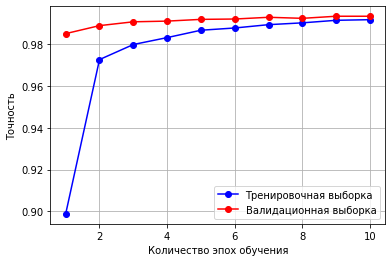

In [37]:
x = range(1, 11)

plt.grid(True)

plt.plot(x, 
         history.history['accuracy'], 
         'bo-', 
         label='Тренировочная выборка')

plt.plot(x, 
         history.history['val_accuracy'],
         'ro-',
         label='Валидационная выборка')

plt.xlabel('Количество эпох обучения')
plt.ylabel('Точность')

plt.legend(loc='lower right')

In [41]:
f1 = open("test_accuracy.txt", 'w')
a = history.history['accuracy']
b = history.history['val_accuracy']
f1.write("Точность на тренировочной выборке\n")
f1.writelines("%f\n" % i for i in a)
f1.write("\n")
f1.write("Точность на валидационной выборке\n")
f1.writelines("%f\n" % i for i in b)
f1.close()

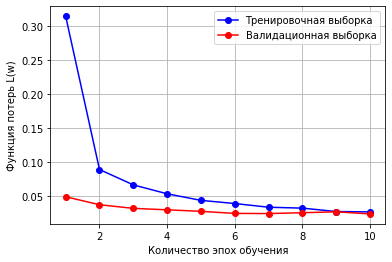

In [40]:
x = range(1, 11)

plt.grid(True)

plt.plot(x, 
         history.history['loss'], 
         'bo-', 
         label='Тренировочная выборка')

plt.plot(x, 
         history.history['val_loss'],
         'ro-',
         label='Валидационная выборка')

plt.xlabel('Количество эпох обучения')
plt.ylabel('Функция потерь L(w)')

plt.legend(loc='upper right')

In [42]:
f2 = open("test_loss.txt", 'w')
c = history.history['loss']
d = history.history['val_loss']
f2.write("Ошибка на тренировочной выборке\n")
f2.writelines("%f\n" % i for i in c)
f2.write("\n")
f2.write("Ошибка на валидационной выборке\n")
f2.writelines("%f\n" % i for i in d)
f2.close()

In [43]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0181 - accuracy: 0.9938
Test loss: 0.018117977306246758
Test accuracy: 0.9937999844551086


In [44]:
def initialize():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_test = X_test.reshape((10000,28,28,1)).astype('float32') /255
    X_train = X_train.reshape((60000,28,28,1)).astype('float32') / 255
    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    # Преобразование правильных ответов по категориям
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    return X_test

In [45]:
#рандомное закрашивание пикселов изображения
def deform_random(X_test, size):
    if size == 0: 
        return X_test
    for i in range(10000):
        array = random_array(size)
        for j in array:
            for k in range(0,28):
                X_test[i][j][k] = 0
    return X_test

In [46]:
def random_array(size):
    array = np.unique(np.random.randint(0, 27, size))
    while size != len(array) :
        num = np.random.randint(0,27)
        array = np.unique(np.append(array, num))
    return array

In [53]:
array_acc = []
array_loss = []
for i in range(0, 28):
    x = initialize()
    X_test_deform = deform_random(x , i)
    score = model.evaluate(X_test_deform, y_test)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    array_loss = np.append(array_loss, score[0])
    array_acc = np.append(array_acc, score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0181 - accuracy: 0.9938
Test loss: 0.018117977306246758
Test accuracy: 0.9937999844551086
313/313 [==============================] - 2s 5ms/step - loss: 0.0242 - accuracy: 0.9920
Test loss: 0.024220604449510574
Test accuracy: 0.9919999837875366
313/313 [==============================] - 2s 5ms/step - loss: 0.0380 - accuracy: 0.9878
Test loss: 0.038002174347639084
Test accuracy: 0.9878000020980835
313/313 [==============================] - 2s 5ms/step - loss: 0.0666 - accuracy: 0.9788
Test loss: 0.06660916656255722
Test accuracy: 0.9787999987602234
313/313 [==============================] - 2s 5ms/step - loss: 0.1108 - accuracy: 0.9646
Test loss: 0.11075577139854431
Test accuracy: 0.9646000266075134
313/313 [==============================] - 2s 5ms/step - loss: 0.1737 - accuracy: 0.9450
Test loss: 0.17368389666080475
Test accuracy: 0.9449999928474426
313/313 [==============================] - 2s 5ms/step - loss: 0.2616 - a

In [54]:
f3 = open("test_result_deform.txt", 'w')
f3.write("Точность с учетом деформации")
f3.writelines("%f\n" % i for i in array_acc)
f3.close()

In [55]:
f4 = open("test_result_deform_loss.txt", 'w')
f4.write("Ошибка с учетом деформации")
f4.writelines("%f\n" % i for i in array_loss)
f4.close()

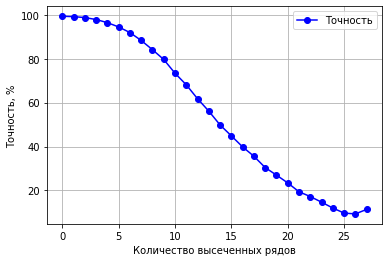

In [56]:
t = range(28)

plt.grid(True)

plt.plot(t, 
         array_acc*100, 
         'bo-', 
         label='Точность')
plt.xlabel('Количество высеченных рядов')
plt.ylabel('Точность, %')

plt.legend(loc='upper right')

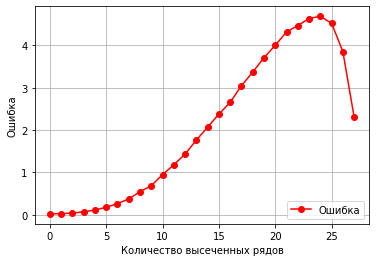

In [58]:
t = range(28)

plt.grid(True)

plt.plot(t, 
         array_loss, 
         'ro-', 
         label='Ошибка')
plt.xlabel('Количество высеченных рядов')
plt.ylabel('Ошибкa')

plt.legend(loc='lower right')

In [59]:
model.save('my_model_final.h5')


In [ ]:
model = load_model('my_model_final.h5')